In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CV_assign/Assign3

/content/drive/MyDrive/CV_assign/Assign3


In [ ]:
data = {'FileName' : ['tajmahal1.jpg','tajmahal2.jpg','tajmahal3.jpg','Redeemer1.jpg','Redeemer2.jpg','Redeemer3.jpg','petra1.jpg','petra2.jpg','petra3.jpg','Itza1.jpg','Itza2.jpg','Itza3.jpg','Itza4.jpg','Itza5.jpg','colosseum1.jpg','colosseum2.jpg','colosseum3.jpg','colosseum4.jpg']}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
len(df)

18

In [ ]:
labels = {0:'Taj Mahal', 1: 'Redeemer', 2: 'Pertra', 3:'Itza', 4:'colosseum'}

In [ ]:
df['class']=[0,0,0,1,1,1,2,2,2,3,3,3,3,3,4,4,4,4]

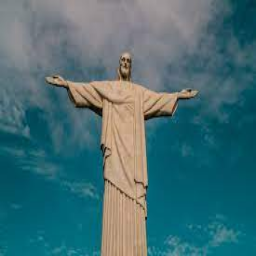

In [ ]:
test = cv2.imread('test7.jpg')
test = cv2.resize(src=test, dsize=(256,256))
cv2_imshow(test)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
k_p,dp = sift.detectAndCompute(test,None)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
avg_distance=[]
for i in df.FileName:
  image = cv2.imread(i)
  i = cv2.resize(src=image,dsize=(256,256))
  keypoints, descriptors = sift.detectAndCompute(image, None)
  matches = bf.match(descriptors,dp)
  matches = sorted(matches, key = lambda x:x.distance)
  sum = 0;
  for i in range(15):
    sum = sum+matches[i].distance
  avg_distance.append(sum/15)

In [ ]:
df['average distance'] = avg_distance

In [ ]:
df

,FileName,class,average distance
0,tajmahal1.jpg,0,1028.600000
1,tajmahal2.jpg,0,1020.466667
2,tajmahal3.jpg,0,1366.600000
3,Redeemer1.jpg,1,839.400000
4,Redeemer2.jpg,1,1181.866667
5,Redeemer3.jpg,1,870.133333
6,petra1.jpg,2,946.733333
7,petra2.jpg,2,940.000000
8,petra3.jpg,2,1076.600000
9,Itza1.jpg,3,1458.333333


In [ ]:
answer= pd.DataFrame(df.groupby('average distance').first()).iloc[0]

In [ ]:
print("The image is of ")
labels[answer['class']]

The image is of 


'Redeemer'

In [ ]:
answer_image = cv2.imread(answer['FileName'])

answer_image =  cv2.resize(answer_image,(256,256))
keypoints, descriptors = sift.detectAndCompute(answer_image, None)
# print(keypoints)
matches = bf.match(descriptors,dp)
matches = sorted(matches, key = lambda x:x.distance)

matched_img = cv2.drawMatches(answer_image, keypoints,test, k_p, matches[:10], test) 

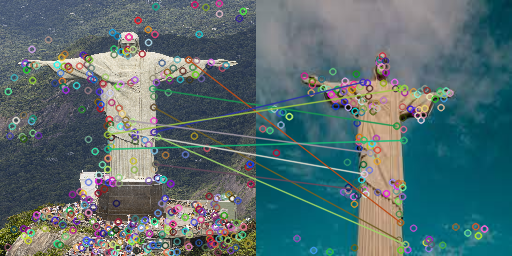

In [ ]:
cv2_imshow(matched_img)